<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/Q_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Generation 0: Best fitness = 0.6875
Generation 10: Best fitness = 0.8125
Generation 20: Best fitness = 0.8125
Generation 30: Best fitness = 0.8125
Generation 40: Best fitness = 0.8125
No perfect solution found, returning best circuit


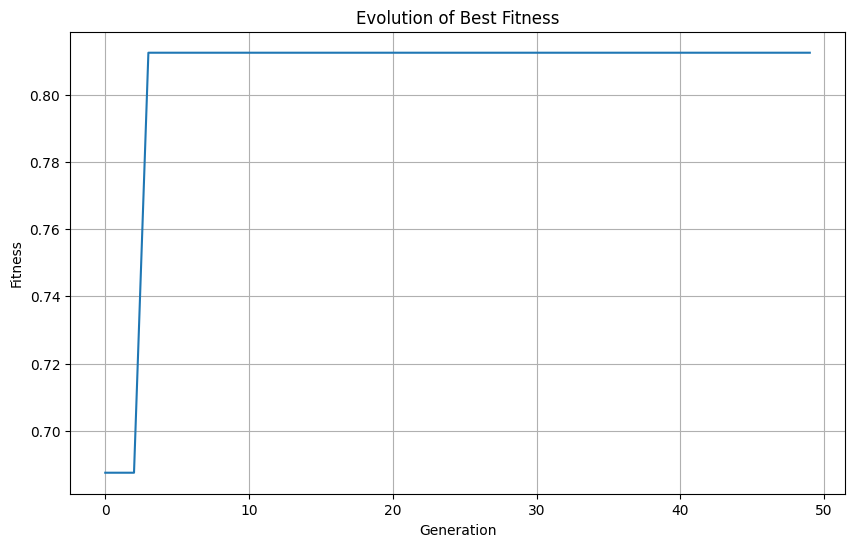


Best quantum circuit found:
Step 1: RX on qubits [cirq.GridQubit(0, 0)], parameters: [2.7990076065590195]
Step 2: H on qubits [cirq.GridQubit(0, 0)], parameters: []
Step 3: RY on qubits [cirq.GridQubit(2, 0)], parameters: [2.0822325050212114]
Step 4: RZ on qubits [cirq.GridQubit(2, 0)], parameters: [4.565532696615504]
Step 5: CNOT on qubits [cirq.GridQubit(0, 0), cirq.GridQubit(1, 0)], parameters: []
Step 6: CNOT on qubits [cirq.GridQubit(2, 0), cirq.GridQubit(3, 0)], parameters: []
Step 7: H on qubits [cirq.GridQubit(1, 0)], parameters: []
Step 8: RZ on qubits [cirq.GridQubit(3, 0)], parameters: [5.42118954803689]
Step 9: RZ on qubits [cirq.GridQubit(1, 0)], parameters: [4.5329753308159]
Step 10: RY on qubits [cirq.GridQubit(3, 0)], parameters: [5.329383082152912]
Step 11: CNOT on qubits [cirq.GridQubit(1, 0), cirq.GridQubit(2, 0)], parameters: []
Step 12: RY on qubits [cirq.GridQubit(3, 0)], parameters: [1.5100164838427665]
Step 13: H on qubits [cirq.GridQubit(0, 0)], parameters: []

In [10]:
import cirq
import numpy as np
import random
from typing import List, Tuple, Dict, Callable
import matplotlib.pyplot as plt
from cirq.devices import GridQubit
import itertools

class QuantumOperation:
    def __init__(self, operation_type: str, qubits: List[GridQubit], parameters: List[float] = None):
        self.operation_type = operation_type
        self.qubits = qubits
        self.parameters = parameters or []

    def to_cirq_op(self):
        if self.operation_type == "H":
            return cirq.H(self.qubits[0])
        elif self.operation_type == "CNOT":
            return cirq.CNOT(*self.qubits[:2])
        elif self.operation_type == "RX":
            return cirq.rx(self.parameters[0])(*self.qubits[:1])
        elif self.operation_type == "RY":
            return cirq.ry(self.parameters[0])(*self.qubits[:1])
        elif self.operation_type == "RZ":
            return cirq.rz(self.parameters[0])(*self.qubits[:1])
        raise ValueError(f"Unknown operation type: {self.operation_type}")

class QuantumCircuit:
    def __init__(self, operations: List[QuantumOperation], num_qubits: int):
        self.operations = operations
        self.num_qubits = num_qubits
        self.fitness = 0.0
        self.qubits = [GridQubit(i, 0) for i in range(num_qubits)]

    def to_cirq_circuit(self):
        circuit = cirq.Circuit()
        for op in self.operations:
            circuit.append(op.to_cirq_op())
        return circuit

class QuantumSyntheticAI:
    def __init__(self, population_size: int = 4, mutation_rate: float = 0.2):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.available_operations = ["H", "CNOT", "RX", "RY", "RZ"]

    def generate_random_circuit(self, num_operations: int, num_qubits: int) -> QuantumCircuit:
        qubits = [GridQubit(i, 0) for i in range(num_qubits)]
        operations = []

        for _ in range(num_operations):
            op_type = random.choice(self.available_operations)
            if op_type == "CNOT":
                q1, q2 = random.sample(qubits, 2)
                op_qubits = [q1, q2]
                parameters = None
            elif op_type in ["RX", "RY", "RZ"]:
                q = random.choice(qubits)
                op_qubits = [q]
                parameters = [random.uniform(0, 2 * np.pi)]
            else:  # H gate
                q = random.choice(qubits)
                op_qubits = [q]
                parameters = None

            operations.append(QuantumOperation(op_type, op_qubits, parameters))

        return QuantumCircuit(operations, num_qubits)

    def mutate_circuit(self, circuit: QuantumCircuit) -> QuantumCircuit:
        new_operations = []
        for op in circuit.operations:
            if random.random() < self.mutation_rate:
                # Create a new random operation
                new_op_type = random.choice(self.available_operations)
                if new_op_type == "CNOT":
                    new_qubits = random.sample(circuit.qubits, 2)
                    parameters = None
                elif new_op_type in ["RX", "RY", "RZ"]:
                    new_qubits = [random.choice(circuit.qubits)]
                    parameters = [random.uniform(0, 2 * np.pi)]
                else:  # H gate
                    new_qubits = [random.choice(circuit.qubits)]
                    parameters = None
                new_operations.append(QuantumOperation(new_op_type, new_qubits, parameters))
            else:
                new_operations.append(op)
        return QuantumCircuit(new_operations, circuit.num_qubits)

    def crossover(self, parent1: QuantumCircuit, parent2: QuantumCircuit) -> QuantumCircuit:
        split_point = random.randint(1, len(parent1.operations) - 1)
        child_operations = parent1.operations[:split_point] + parent2.operations[split_point:]
        return QuantumCircuit(child_operations, parent1.num_qubits)

    def evaluate_circuit(self, circuit: QuantumCircuit, simulator) -> np.ndarray:
        cirq_circuit = circuit.to_cirq_circuit()
        result = simulator.simulate(cirq_circuit)
        return result.final_state_vector

    def state_to_bool(self, state_vector: np.ndarray) -> List[bool]:
        # Convert quantum state to classical boolean outputs
        probabilities = np.abs(state_vector) ** 2
        max_prob_index = np.argmax(probabilities)
        binary_str = format(max_prob_index, f'0{int(np.log2(len(state_vector)))}b')
        return [bit == '1' for bit in binary_str]

    def evolve_circuit(self, target_function: Callable, generations: int = 100,
                      num_operations: int = 10, num_qubits: int = 4):
        simulator = cirq.Simulator()

        def fitness(circuit):
            state_vector = self.evaluate_circuit(circuit, simulator)
            circuit_output = self.state_to_bool(state_vector)

            correct_outputs = 0
            total_tests = 0

            for inputs in itertools.product([False, True], repeat=num_qubits):
                expected = target_function(inputs)
                actual = circuit_output[total_tests % len(circuit_output)]
                if expected == actual:
                    correct_outputs += 1
                total_tests += 1

            return correct_outputs / total_tests

        population = [self.generate_random_circuit(num_operations, num_qubits)
                     for _ in range(self.population_size)]

        best_fitnesses = []

        for generation in range(generations):
            for circuit in population:
                circuit.fitness = fitness(circuit)

            population.sort(key=lambda x: x.fitness, reverse=True)
            best_circuit = population[0]
            best_fitnesses.append(best_circuit.fitness)

            if best_circuit.fitness >= 0.99:  # Allow for some quantum uncertainty
                print(f"Near-perfect solution found in generation {generation}")
                self.plot_fitness_evolution(best_fitnesses)
                return best_circuit

            new_population = population[:self.population_size // 2]

            while len(new_population) < self.population_size:
                parent1, parent2 = random.sample(population[:self.population_size // 2], 2)
                child = self.crossover(parent1, parent2)
                child = self.mutate_circuit(child)
                new_population.append(child)

            population = new_population

            if generation % 10 == 0:
                print(f"Generation {generation}: Best fitness = {best_circuit.fitness}")

        print("No perfect solution found, returning best circuit")
        self.plot_fitness_evolution(best_fitnesses)
        return population[0]

    def plot_fitness_evolution(self, fitnesses):
        plt.figure(figsize=(10, 6))
        plt.plot(fitnesses)
        plt.title('Evolution of Best Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.show()

# Example usage
def target_function(inputs):
    return (inputs[0] and inputs[1]) or (inputs[2] and inputs[3])

quantum_ai = QuantumSyntheticAI()
best_circuit = quantum_ai.evolve_circuit(target_function, generations=50, num_operations=15, num_qubits=4)

print("\nBest quantum circuit found:")
for i, op in enumerate(best_circuit.operations):
    print(f"Step {i+1}: {op.operation_type} on qubits {op.qubits}, parameters: {op.parameters}")

# Test the best circuit
simulator = cirq.Simulator()
final_state = quantum_ai.evaluate_circuit(best_circuit, simulator)
print("\nFinal quantum state:", final_state)

print("\nTesting the best circuit:")
circuit_output = quantum_ai.state_to_bool(final_state)
for inputs in itertools.product([False, True], repeat=4):
    expected_output = target_function(inputs)
    print(f"Inputs: {inputs}, Circuit Output: {circuit_output}, Expected Output: {expected_output}")